In [1]:
import google.protobuf as protobuf
import numpy as np
import lmdb as lmdb
import caffe_pb2 as caffe
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [51]:
#env = lmdb.open('neutrino/output_supera.mdb', readonly=True)
env = lmdb.open('cosmics/output_supera.mdb', readonly=True)
print env

In [119]:
with env.begin() as txn:
    cursor = txn.cursor()
    #cursor.first()
    cursor.get("run000001_subrun0001_event000001_img21of22")   
    print cursor.item()[0]
    print len(cursor.item()[1])
    raw_datum = cursor.item()[1]


run000001_subrun0001_event000001_img21of22
305055


In [120]:
datum = caffe.Datum()
datum.ParseFromString(raw_datum)

247 247 1


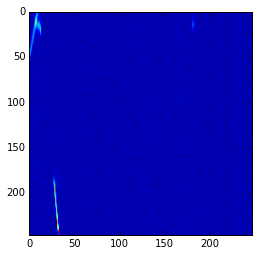

In [121]:
# convert to numpy array
print datum.height,datum.width,datum.channels
h = datum.height
w = datum.width
start = 0
end = h
image = np.zeros( (end-start,w), dtype=np.float )
for t in xrange(0,end-start):
    image[t,:] = datum.float_data[ datum.width*(start+t): datum.width*(start+t+1)]
imgplot = plt.imshow(image)